In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [172]:
df = pd.read_csv('train.csv')

In [173]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# Boston Data Description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

- **crim**: per capita crime rate by town.
- **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus**: proportion of non-retail business acres per town.
- **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox**: nitrogen oxides concentration (parts per 10 million).
- **rm**: average number of rooms per dwelling.
- **age**: proportion of owner-occupied units built prior to 1940.
- **dis**: weighted mean of distances to five Boston employment centres.
- **rad**: index of accessibility to radial highways.
- **tax**: full-value property-tax rate per \$10,000.
- **ptratio**: pupil-teacher ratio by town.
- **black**: 1000(Bk - 0.63)\^2 where Bk is the proportion of blacks by town.
- **lstat**: lower status of the population (percent).
- **medv**: median value of owner-occupied homes in \$1000s.


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


No null values and no object column, all are numeric columns

In [175]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Data Visualization 

<Axes: >

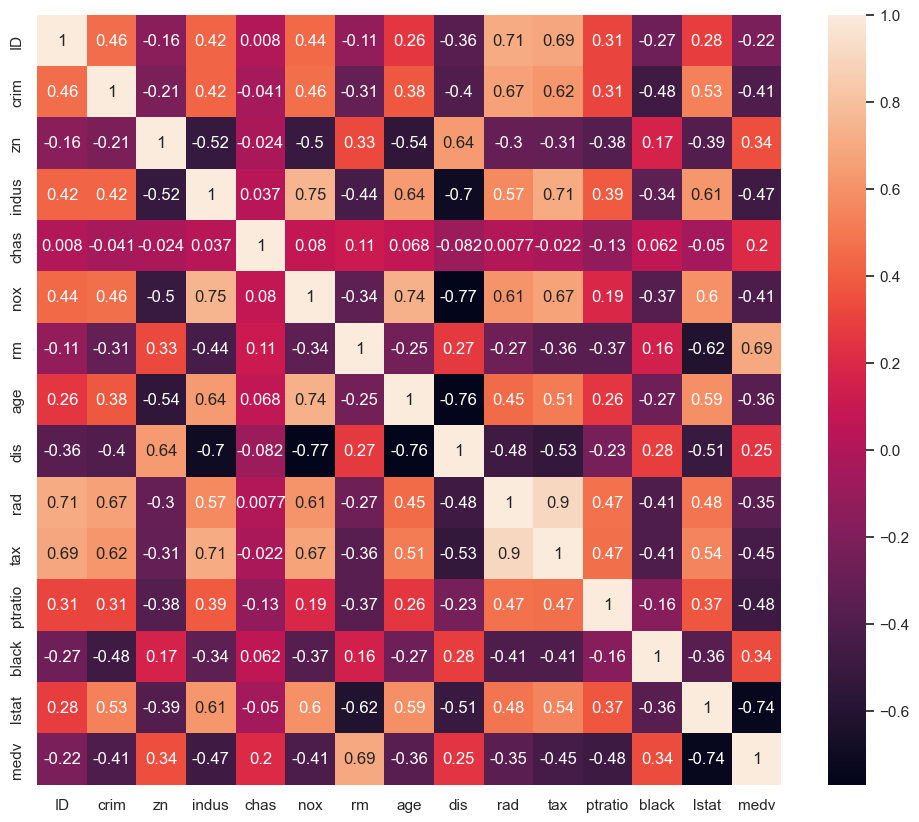

In [176]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

##### Observation:
- The correlation heatmap reveals strong positive/negative relationships between lstat and medv.

<Axes: xlabel='medv', ylabel='lstat'>

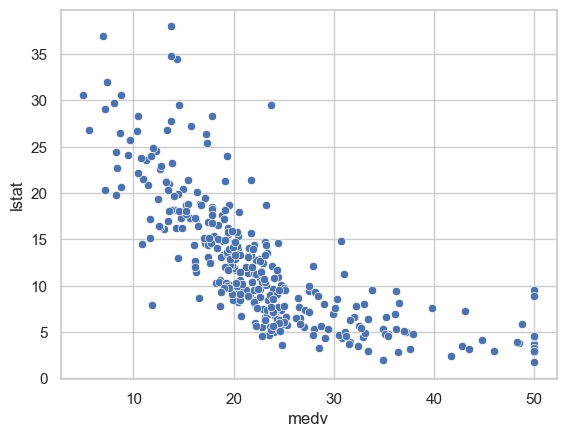

In [177]:
sns.scatterplot(x='medv', y='lstat', data=df)

In [178]:
df.shape

(333, 15)

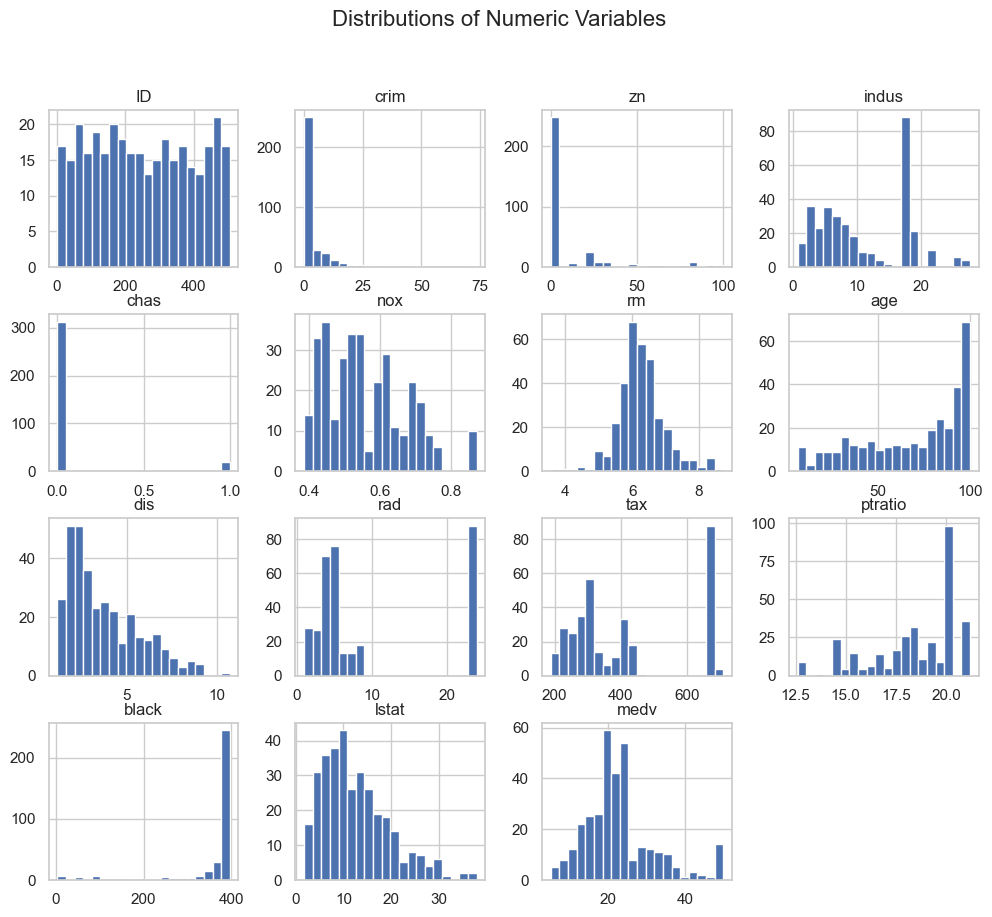

In [179]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distributions of Numeric Variables', fontsize=16)
plt.show()


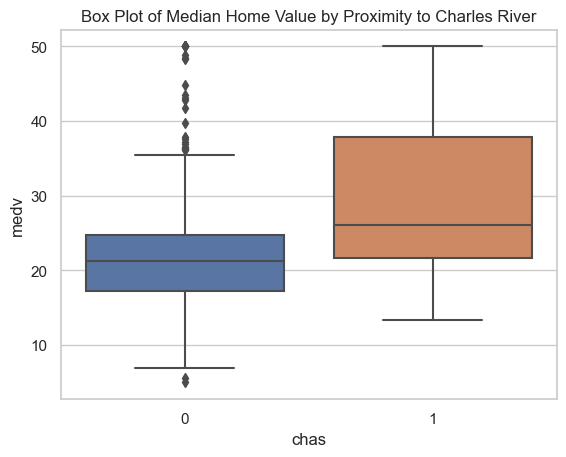

In [180]:
sns.boxplot(x='chas', y='medv', data=df)
plt.title('Box Plot of Median Home Value by Proximity to Charles River')
plt.show()

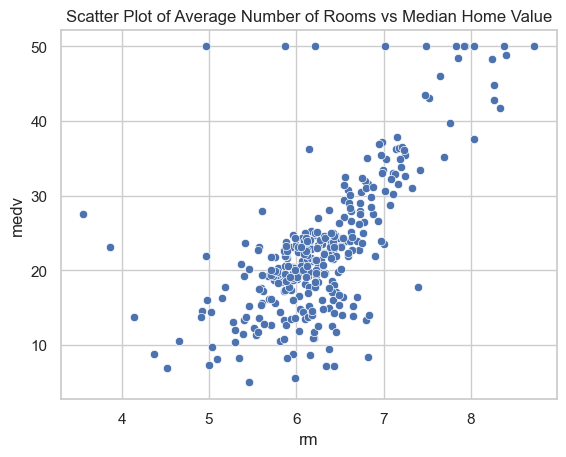

In [181]:
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('Scatter Plot of Average Number of Rooms vs Median Home Value')
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

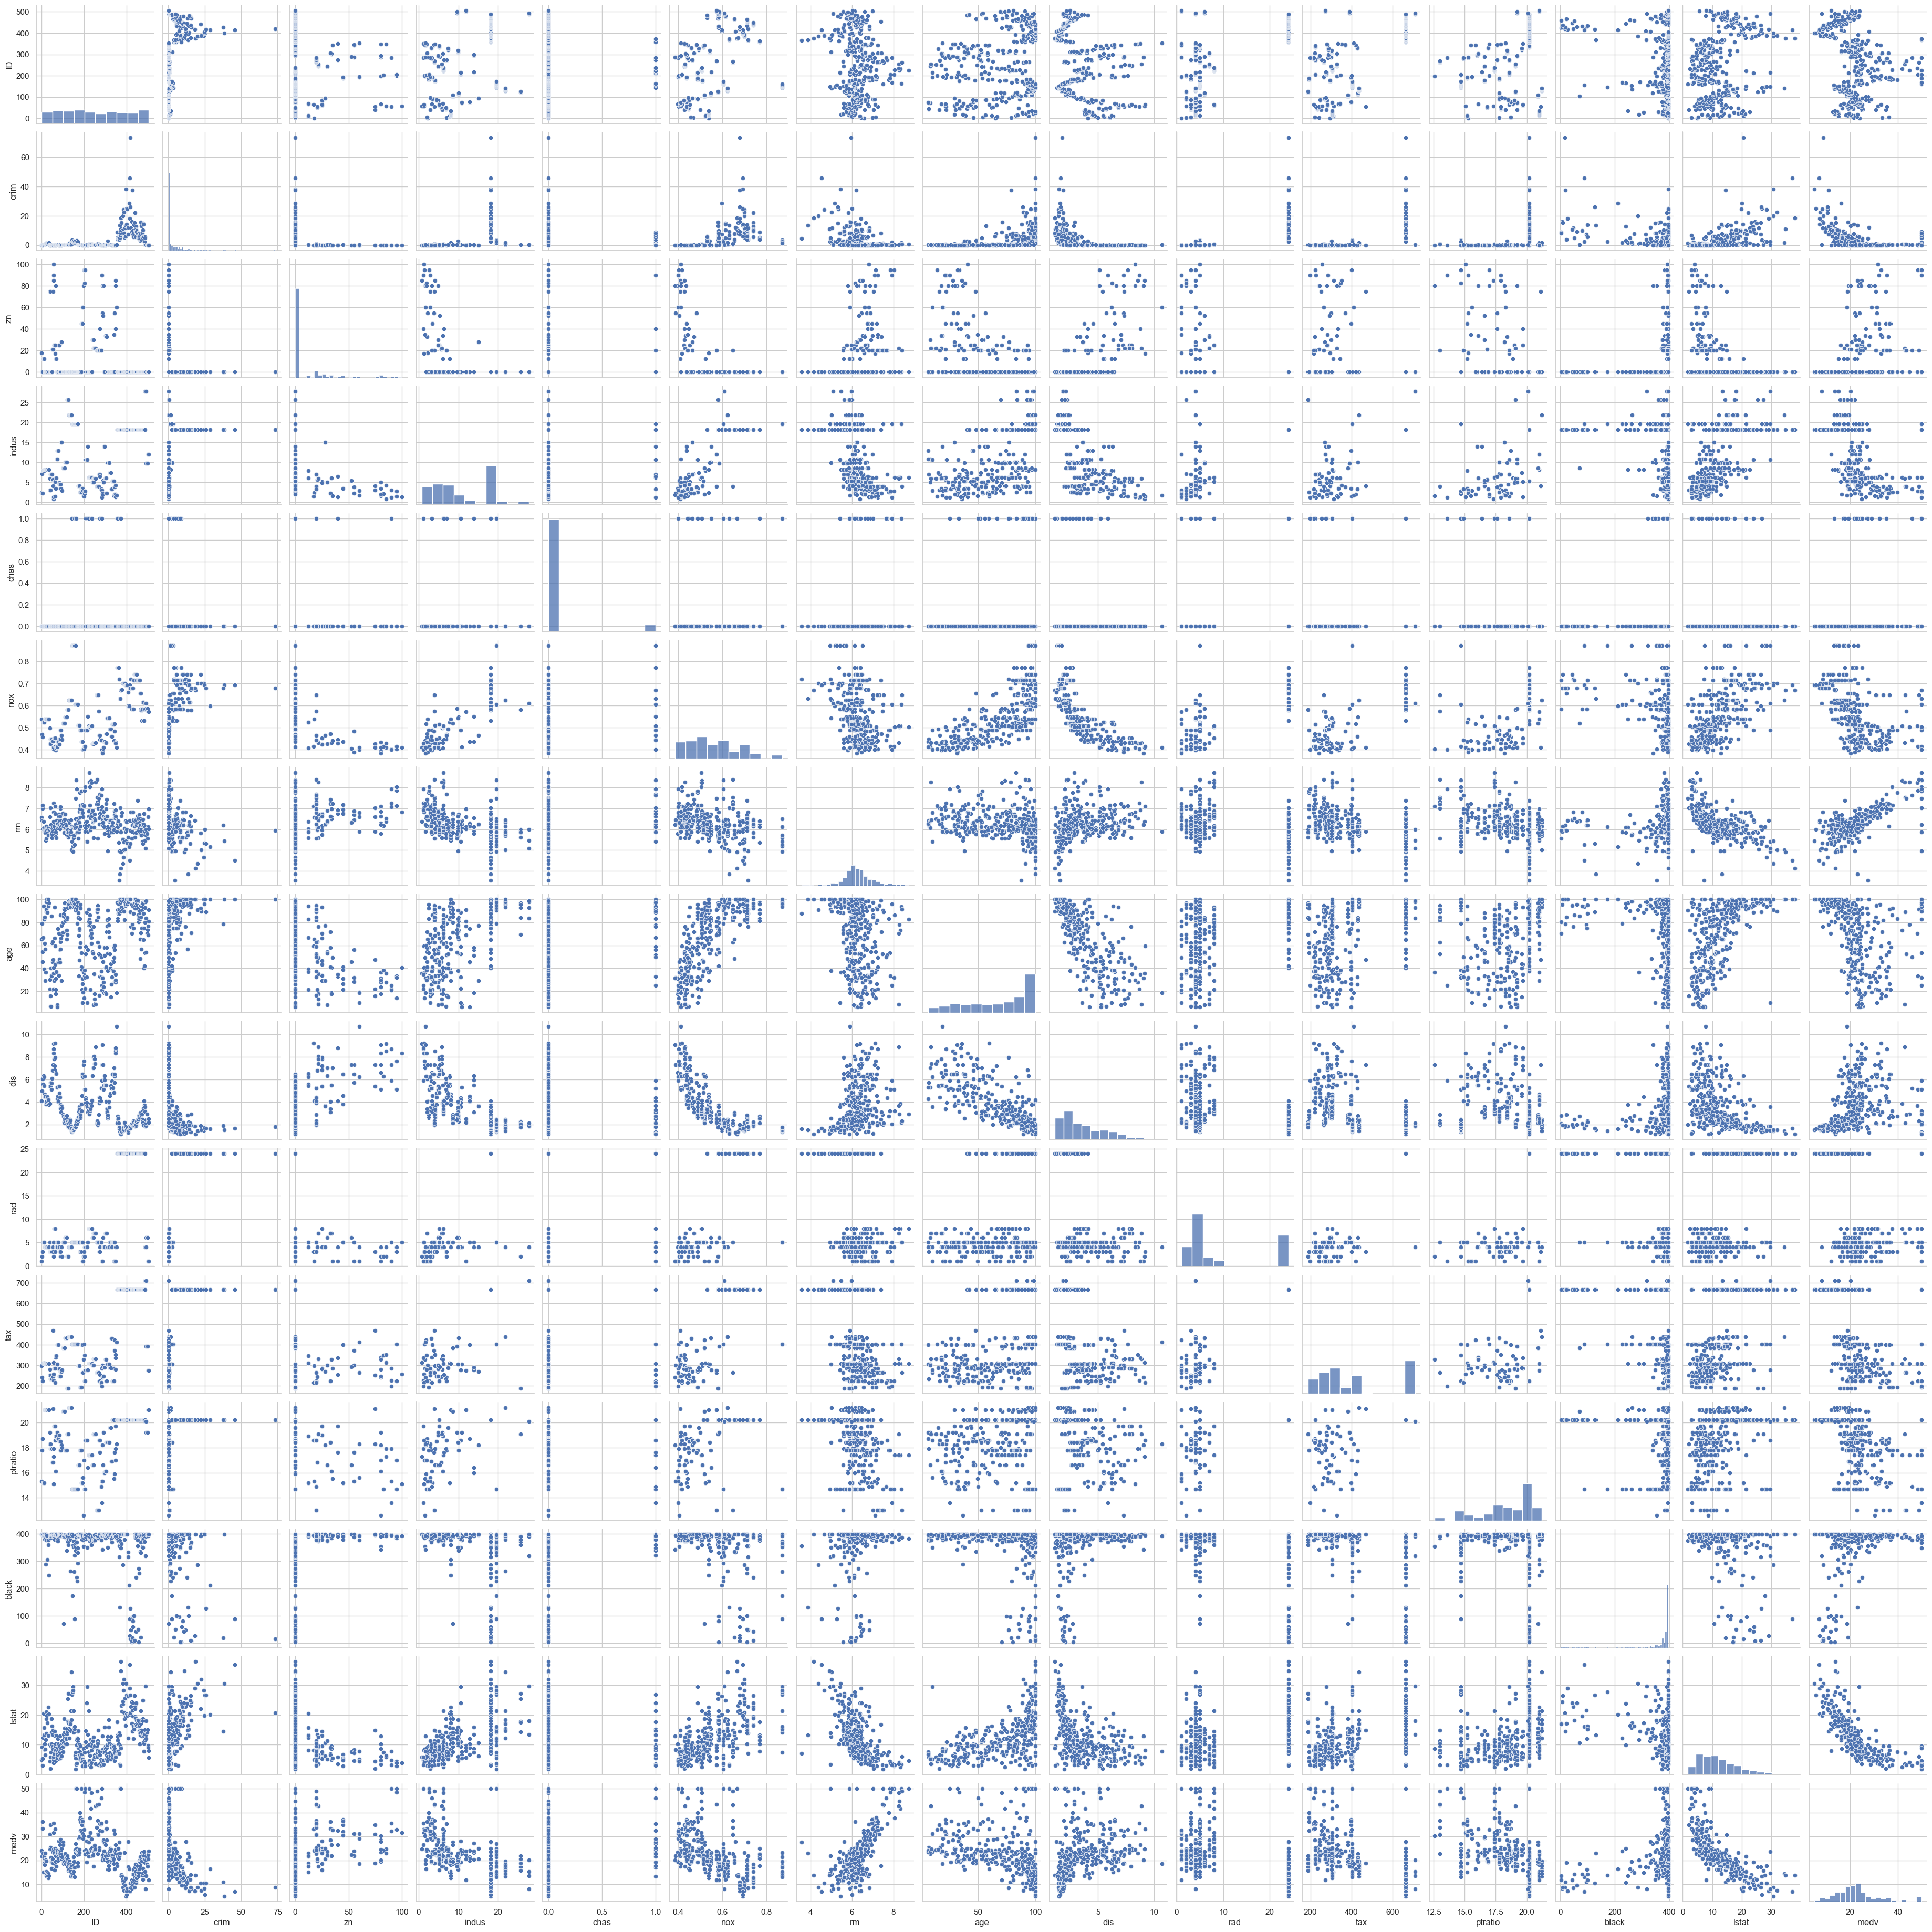

In [182]:
sns.pairplot(df)

## Data Modeling

In [183]:
X=df.drop('medv', axis=1)
y=df['medv']

In [184]:
X.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [185]:
scaler = StandardScaler()

In [186]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.69301403, -0.45687496,  0.32290583, ..., -1.46517068,
         0.43298984, -1.06777158],
       [-1.68624067, -0.45401577, -0.47212294, ..., -0.30161579,
         0.43298984, -0.47829937],
       [-1.67269396, -0.45332651, -0.47212294, ...,  0.11726397,
         0.40673324, -1.35683968],
       ...,
       [ 1.70721164, -0.45156931, -0.47212294, ...,  1.18773447,
         0.43298984, -0.48680137],
       [ 1.713985  , -0.4494593 , -0.47212294, ...,  1.18773447,
         0.43298984, -0.97424954],
       [ 1.72753171, -0.4512778 , -0.47212294, ...,  1.18773447,
         0.43298984, -0.65684143]])

In [187]:
models = {'Linear Regression':LinearRegression(), 'Decision Tree':DecisionTreeRegressor(), 
          'Random Forest': RandomForestRegressor(), 'SVM':SVR(), 'Gradient Boosting': GradientBoostingRegressor()}

In [203]:
r2_scores=[]
error=[]
r2_scores_after_scaling=[]
error_after_scaling=[]
model_names=list(models.keys())

In [204]:
def model_fit_and_results(model_name, features, target):
    model=models[model_name]
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2-Score: ",r2_score(y_test,y_pred))
    print("MSE: ",mean_squared_error(y_test,y_pred))
    return r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred)

#### Before Scaling Data

In [205]:
for model in models.keys():
    print(model)
    score, mse = model_fit_and_results(model, X, y)
    r2_scores.append(score)
    error.append(mse)
    print()

Linear Regression
R2-Score:  0.6747125604355835
MSE:  25.580554972349297

Decision Tree
R2-Score:  0.7612732831440233
MSE:  16.426417910447757

Random Forest
R2-Score:  0.8705668433616978
MSE:  13.690405343283587

SVM
R2-Score:  0.2920425490184748
MSE:  62.29339217372848

Gradient Boosting
R2-Score:  0.8100112052197259
MSE:  19.427075030189258



In [206]:
model_names

['Linear Regression',
 'Decision Tree',
 'Random Forest',
 'SVM',
 'Gradient Boosting']

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


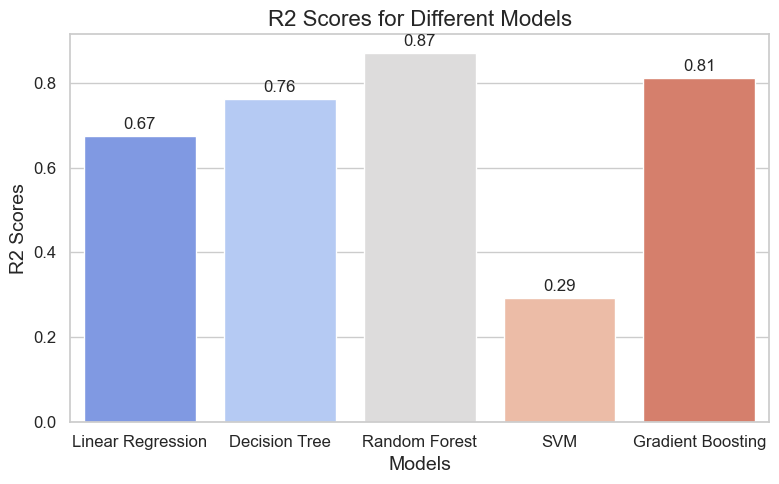

In [207]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=model_names, y=r2_scores, palette="coolwarm")

# Add labels and title
barplot.set_xlabel('Models', fontsize=14)
barplot.set_ylabel('R2 Scores', fontsize=14)
barplot.set_title('R2 Scores for Different Models', fontsize=16)

# Add value annotations on top of bars
for index, value in enumerate(r2_scores):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


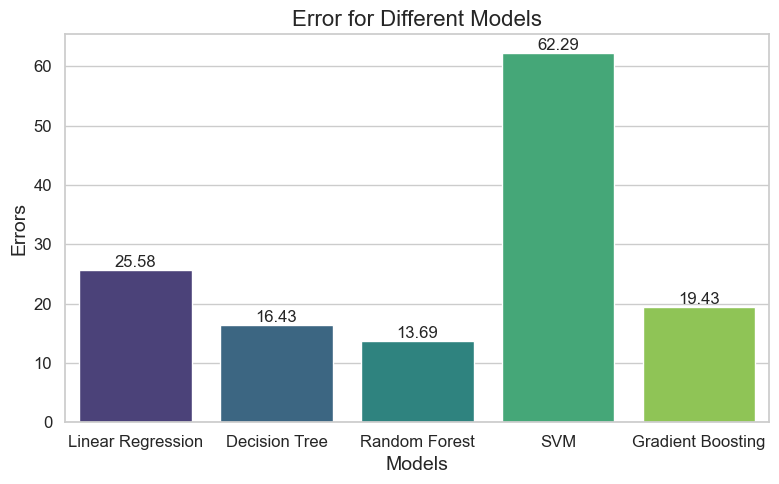

In [208]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=model_names, y=error, palette="viridis")

# Add labels and title
barplot.set_xlabel('Models', fontsize=14)
barplot.set_ylabel('Errors', fontsize=14)
barplot.set_title('Error for Different Models', fontsize=16)

# Add value annotations on top of bars
for index, value in enumerate(error):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### After Scaling Data

In [209]:
for model in models.keys():
    print(model)
    score, mse = model_fit_and_results(model, X_scaled, y)
    r2_scores_after_scaling.append(score)
    error_after_scaling.append(mse)
    print()

Linear Regression
R2-Score:  0.7593645940628835
MSE:  17.148162549324752

Decision Tree
R2-Score:  0.7805205196982521
MSE:  19.760746268656717

Random Forest
R2-Score:  0.7669469555436282
MSE:  25.965446343283585

SVM
R2-Score:  0.7208644190289873
MSE:  18.352606675139175

Gradient Boosting
R2-Score:  0.8590354927095358
MSE:  12.387766207002494



In [210]:
r2_scores_after_scaling

[0.7593645940628835,
 0.7805205196982521,
 0.7669469555436282,
 0.7208644190289873,
 0.8590354927095358]

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


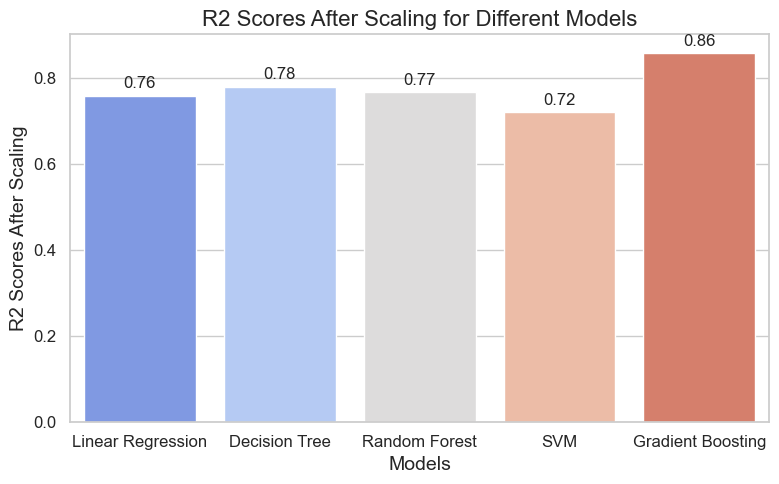

In [211]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=model_names, y=r2_scores_after_scaling, palette="coolwarm")

# Add labels and title
barplot.set_xlabel('Models', fontsize=14)
barplot.set_ylabel('R2 Scores After Scaling', fontsize=14)
barplot.set_title('R2 Scores After Scaling for Different Models', fontsize=16)

# Add value annotations on top of bars
for index, value in enumerate(r2_scores_after_scaling):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


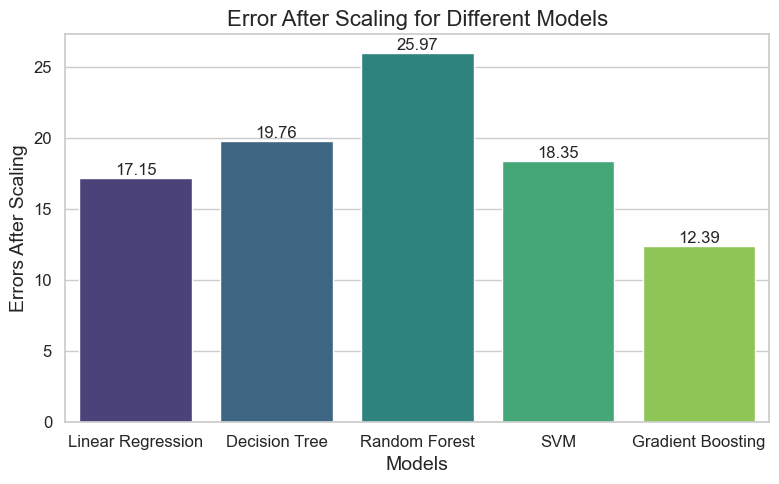

In [212]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=model_names, y=error_after_scaling, palette="viridis")

# Add labels and title
barplot.set_xlabel('Models', fontsize=14)
barplot.set_ylabel('Errors After Scaling', fontsize=14)
barplot.set_title('Error After Scaling for Different Models', fontsize=16)

# Add value annotations on top of bars
for index, value in enumerate(error_after_scaling):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

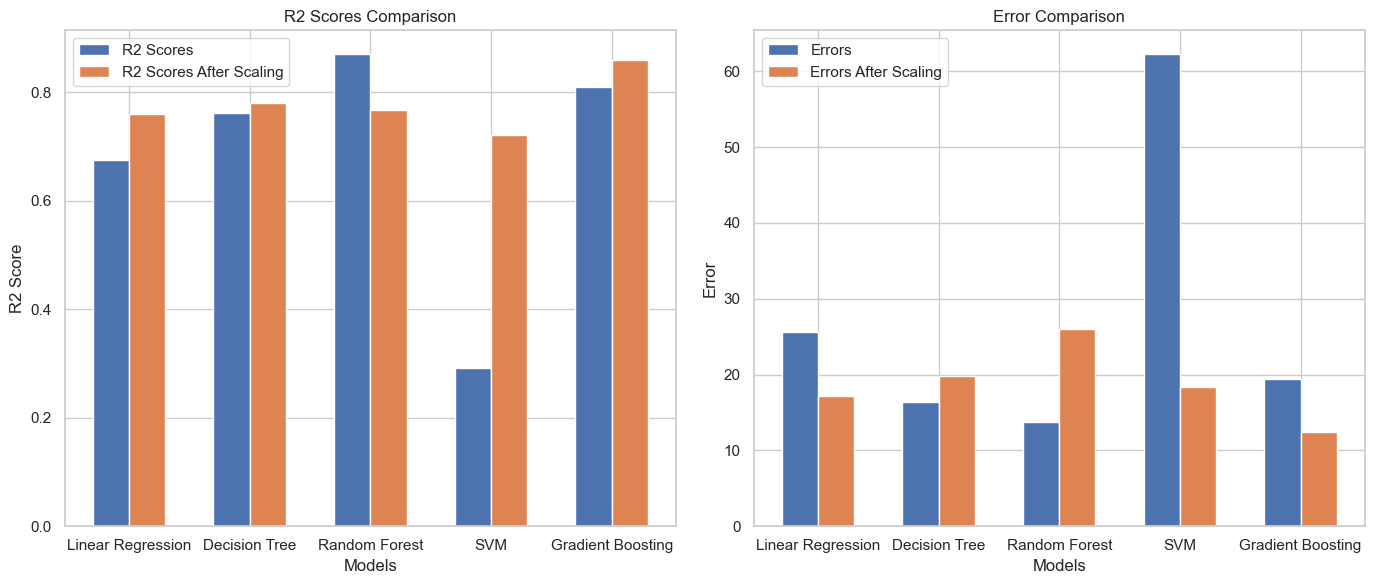

In [213]:
bar_width = 0.3

# Set positions of bars on x-axis
r2_positions = np.arange(len(model_names))
error_positions = np.arange(len(model_names))

# Create the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for R2 scores
ax1.bar(r2_positions - bar_width/2, r2_scores, bar_width, label='R2 Scores')
ax1.bar(r2_positions + bar_width/2, r2_scores_after_scaling, bar_width, label='R2 Scores After Scaling')
ax1.set_xlabel('Models')
ax1.set_ylabel('R2 Score')
ax1.set_title('R2 Scores Comparison')
ax1.set_xticks(r2_positions)
ax1.set_xticklabels(model_names)
ax1.legend()

# Plot for Errors
ax2.bar(error_positions - bar_width/2, error, bar_width, label='Errors')
ax2.bar(error_positions + bar_width/2, error_after_scaling, bar_width, label='Errors After Scaling')
ax2.set_xlabel('Models')
ax2.set_ylabel('Error')
ax2.set_title('Error Comparison')
ax2.set_xticks(error_positions)
ax2.set_xticklabels(model_names)
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()